In [1]:
# Imports
import sys
sys.path.append('../')
from imports import *

print(sys.path)

['x:\\git\\LRZ\\masters-thesis\\prediction', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310\\python310.zip', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310\\DLLs', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310\\lib', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310', '', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\win32\\lib', 'c:\\Users\\BeneDesktop\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\Pythonwin', '../']


IoT Server at 100.113.141.113 initialized
+---------------------+-------------------------------------------------+
|        Field        |                      Value                      |
+---------------------+-------------------------------------------------+
|          IP         |                 100.113.141.113                 |
|       Devices       |                 ['INV2', 'INV3']                |
|      Time (abs)     | 2024-06-18T00:00:00Z < t < 2024-06-19T00:00:00Z |
|      Time (rel)     |                       None                      |
|      Time (res)     |                        1m                       |
| Prediction horizont |                      15 min                     |
|      Delimiter      |                        ;                        |
|         CWD         |       x:\git\LRZ\masters-thesis\prediction      |
|     Backend Port    |                       5000                      |
|     Backend Path    |                  download-file                

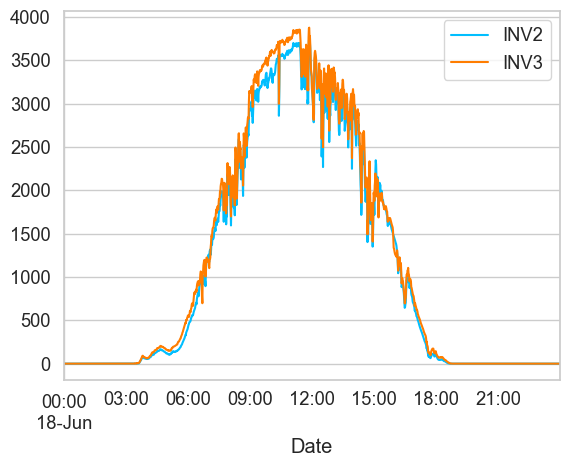

In [2]:
# Specify the IoT Server interface --> only working within the Tailscale VPN connection
ip = "100.113.141.113"
devices = ["INV2", "INV3"] # First device defines the value to be forecasted
time_abs_start = "2024-06-18T00:00:00Z"
time_abs_end   = "2024-06-19T00:00:00Z"
# time_abs_start = "2024-08-25T00:00:00Z"
# time_abs_end   = "2024-08-26T00:00:00Z"

time_range = "None"
res = "1m"

# Day before --> basis for prediction
prev_iot_server = IotGrabber(
                          ip=ip,
                          devices=devices,
                          time_abs_start=time_abs_start,
                          time_abs_end=time_abs_end,
                          range=time_range,
                          res=res,
                          delimiter=";",
                          cwd=os.getcwd()
                          )

print(prev_iot_server)
df = prev_iot_server.get_df()


df.plot()

df.to_csv("comparison-INV2-INV3.csv", sep=";")
rmse_inv2_inv3 = calc_rmse(max(df.INV2.values), max(df.INV3.values))
print(f"RMSE INV2-->INV3: {rmse_inv2_inv3}")
